In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.metrics import roc_auc_score

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

# Chargement des données

In [8]:
df = pd.read_csv('../projetTrain.csv')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51381 entries, 0 to 51380
Columns: 128 entries, Id to target
dtypes: float64(18), int64(109), object(1)
memory usage: 50.2+ MB


   # Standardiser les fichiers 

In [10]:
1 == True

True

<span style="color:red">
En python, 1 et True ont la même valeur. c'est à peu près vrai dans tous les langages : en fait, 0 est faux, le reste est vrai
</span>

In [11]:
df['trgt'] = df.apply(lambda row: 1 if row['target'] == True else 0, axis=1)

In [12]:
str(df.trgt)

'0        1\n1        0\n2        1\n3        1\n4        1\n5        1\n6        0\n7        1\n8        0\n9        0\n10       0\n11       0\n12       1\n13       0\n14       1\n15       0\n16       0\n17       1\n18       1\n19       0\n20       0\n21       1\n22       0\n23       1\n24       0\n25       1\n26       0\n27       0\n28       0\n29       0\n        ..\n51351    1\n51352    1\n51353    0\n51354    0\n51355    0\n51356    0\n51357    0\n51358    0\n51359    0\n51360    0\n51361    0\n51362    0\n51363    0\n51364    0\n51365    0\n51366    0\n51367    0\n51368    0\n51369    1\n51370    0\n51371    1\n51372    0\n51373    0\n51374    0\n51375    1\n51376    0\n51377    1\n51378    0\n51379    1\n51380    1\nName: trgt, Length: 51381, dtype: int64'

<span style="color:red">
utilisez la fonction print pour avoir un autre rendu : </span>

In [14]:
print(str(df.target))

0        1
1        0
2        1
3        1
4        1
5        1
6        0
7        1
8        0
9        0
10       0
11       0
12       1
13       0
14       1
15       0
16       0
17       1
18       1
19       0
20       0
21       1
22       0
23       1
24       0
25       1
26       0
27       0
28       0
29       0
        ..
51351    1
51352    1
51353    0
51354    0
51355    0
51356    0
51357    0
51358    0
51359    0
51360    0
51361    0
51362    0
51363    0
51364    0
51365    0
51366    0
51367    0
51368    0
51369    1
51370    0
51371    1
51372    0
51373    0
51374    0
51375    1
51376    0
51377    1
51378    0
51379    1
51380    1
Name: target, Length: 51381, dtype: int64


In [15]:
X=df

In [16]:
y=X.pop("trgt")

In [17]:
X= X.drop('Product_Info_2',axis=1)

In [18]:
X=X.drop('target',axis=1)

In [19]:
X.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,0
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: trgt, dtype: int64

# Random Forest

In [21]:
model= RandomForestRegressor(n_estimators=30,oob_score=True,random_state=42)
model.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [19]:
y_oob=model.oob_prediction_
s=roc_auc_score(y,y_oob)
print ("c-stat :",s) 

c-stat : 0.896506492098


<span style="color:red">
Ce type de recherche de paramètre peut se faire via une grid search.
</span>

In [21]:
results = []
n_estimator_options = [30,50,100]
for trees in n_estimator_options:
    model=RandomForestRegressor(trees,oob_score=True,random_state=42)
    model.fit(X,y)
    print(trees,"trees")
    roc=roc_auc_score(y,model.oob_prediction_)
    print("C-stat :",roc)
    results.append(roc)
    print("")
    

30 trees
C-stat : 0.896506492098

50 trees
C-stat : 0.903979076481

100 trees
C-stat : 0.90976384577



<span style="color:red">
Pourquoi avoir repris n_estimators = 30 alors que vous aviez un meilleur résultat avec 50 ou 100 ? 
</span>

In [22]:
#min samples leaf
rocs = {}
min_samples_leaf_options = [1,2,3,4,5,6,7]
for min_samples in min_samples_leaf_options:
    model=RandomForestRegressor(n_estimators=30,oob_score=True,
                               random_state=42,
                               max_features="auto",
                               min_samples_leaf=min_samples)
    model.fit(X,y)
    print(min_samples,"min_samples")
    roc=roc_auc_score(y,model.oob_prediction_)
    rocs[min_samples] =[roc]
    print("C-stat: ",roc)
    

1 min_samples
C-stat:  0.896506492098
2 min_samples
C-stat:  0.90007083883
3 min_samples
C-stat:  0.902170571064
4 min_samples
C-stat:  0.90315544054
5 min_samples
C-stat:  0.905253127582
6 min_samples
C-stat:  0.906000140976
7 min_samples
C-stat:  0.907108910231


In [23]:
import pandas as pd
df = pd.DataFrame(rocs).T

In [24]:
col_name = "ROC"
df.columns = [col_name]

In [25]:
df

,ROC
1,0.896506
2,0.900071
3,0.902171
4,0.903155
5,0.905253
6,0.906000
7,0.907109


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

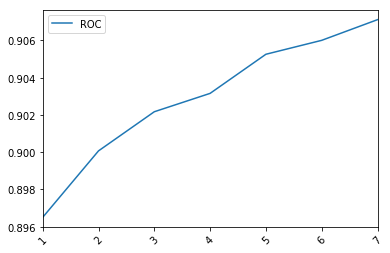

In [27]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

# Séparer jeux d'apprentissage et jeux de tests

In [28]:
from sklearn.cross_validation import train_test_split

C:\Users\ibm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  

#TEST SVM SVC

In [32]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [33]:
print(clf.predict(X_test[0:500]))

[0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 

In [34]:
print(clf.score(X_test,y_test))

0.816112290635


# Grande série d'algorithmes

In [35]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [36]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> ensemble
AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier,GradientBoostingRegressor,IsolationForest,RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding,VotingClassifier

===> feature_selection
GenericUnivariateSelect,RFE,RFECV,SelectFdr,SelectFpr,SelectFromModel,SelectFwe,SelectKBest,SelectPercentile,VarianceThreshold

===> gaussian_process
GaussianProcess,GaussianProcessClassifier,GaussianProcessRegressor

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeCl

In [37]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [93]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
compteur=4

while compteur > 0:
    for classe_de_models in classes_de_models_a_tester:
        modeles_a_tester.extend(algos[classe_de_models])

    
        for pointeur_vers_algo in modeles_a_tester:
            try:
                algorithme = pointeur_vers_algo()
                doc        = algorithme.__doc__
                name       = doc[:min(doc.find(":"), 25)].strip()
                print (name)
                algorithme.fit(X_train, y_train)
                performance = algorithme.score(X_test, y_test)
                print (performance)
                if performance >  best_perf:
                    best_algorithm = algorithme
                    best_perf = performance
                                
                if 0<performance and performance<1:
                    performances[name] = [performance]
       
            except Exception as e:
                if "label" in str(e): print ("Algo de classification")
                else                : print (str(e)[:50])
            print ("="*30)
compteur=compteur-1 
    

An AdaBoost classifier.
0.837697570182
An AdaBoost regressor.
0.333397616622
A Bagging classifier.
0.818235432885
A Bagging regressor.
0.448659766454
An extra-trees classifier
0.808150507195
An extra-trees regressor.


KeyboardInterrupt: 

In [94]:
import pandas as pd
df = pd.DataFrame(performances).T

In [95]:
df.columns = [col_name]

In [96]:
df = df.sort_values(col_name)

In [97]:
df

,ROC
An AdaBoost regressor.,0.333398
A Bagging regressor.,0.448660
An extra-trees classifier,0.808151
A Bagging classifier.,0.818235
An AdaBoost classifier.,0.837698


In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

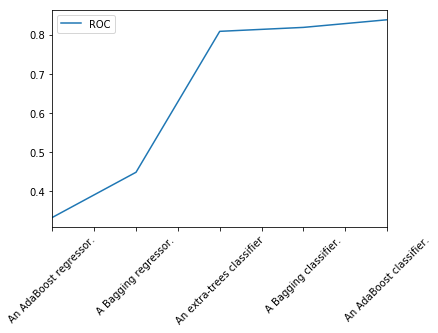

In [98]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

<span style="color:red">
Ok, pas mal de réponses dans le pdf :-)
</span>